# Fourier Transform

In [1]:
import numpy as np
import numpy.fft
from scipy import misc
from scipy.ndimage import convolve
from scipy.signal import convolve2d, correlate2d
import scipy.fftpack as fp
from scipy import signal

In [2]:
from skimage import img_as_float
from skimage.transform import rotate
from skimage.io import imread, imsave, imshow

In [3]:
import matplotlib.pyplot as plt

# Read in images

In [4]:
im = img_as_float(imread('images/rectangle.tif'))
#im = img_as_float(imread('images/cross.png'))
print(im.shape)

(1024, 1024)


# DFT basics using Scipy fftpack

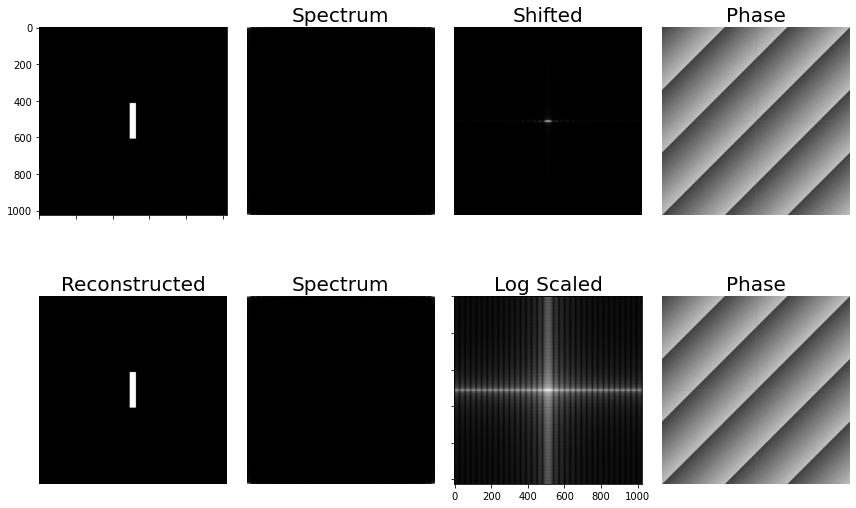

In [5]:
#2D DFT forward transform
F_im = fp.fft2(im)
#computing the spectrum
S = np.abs(F_im)
#shift the origin of the spectrum to the center
S_shifted = fp.fftshift(S)
S_shif_scaled = 20*np.log10(1 + S_shifted)
#computing the phase of DFT
Ph = np.angle(F_im)

#another way of computing the spectrum and phase
R = np.real(F_im)
I = np.imag(F_im)
S_ = np.sqrt(R**2 + I**2)
S__shifted = fp.fftshift(S_)
Ph_ = np.arctan2(I, R)

#computing the inverse DFT
Re_im = fp.ifft2(F_im).real

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 8), sharex=True, sharey=True)            
plt.subplot(2,4,1), plt.imshow(im, cmap=plt.cm.gray)
plt.subplot(2,4,2), plt.imshow(S, cmap=plt.cm.gray)
plt.title('Spectrum', size=20), plt.axis('off')
plt.subplot(2,4,3), plt.imshow(S_shifted, cmap='gray')
plt.title('Shifted', size=20), plt.axis('off')
plt.subplot(2,4,4), plt.imshow(Ph, cmap=plt.cm.gray)
plt.title('Phase', size=20), plt.axis('off')
plt.subplot(2,4,5), plt.imshow(Re_im, cmap=plt.cm.gray)
plt.title('Reconstructed', size=20) 
plt.axis('off')
plt.subplot(2,4,6), plt.imshow(S_, cmap=plt.cm.gray)
plt.title('Spectrum', size=20), plt.axis('off')
#plt.subplot(2,4,7), plt.imshow(S__shifted, cmap='gray')
#plt.title('Shifted', size=20)
plt.subplot(2,4,7), plt.imshow(S_shif_scaled, cmap='gray')
plt.title('Log Scaled', size=20)
plt.subplot(2,4,8), plt.imshow(Ph_, cmap=plt.cm.gray)
plt.title('Phase', size=20), plt.axis('off')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

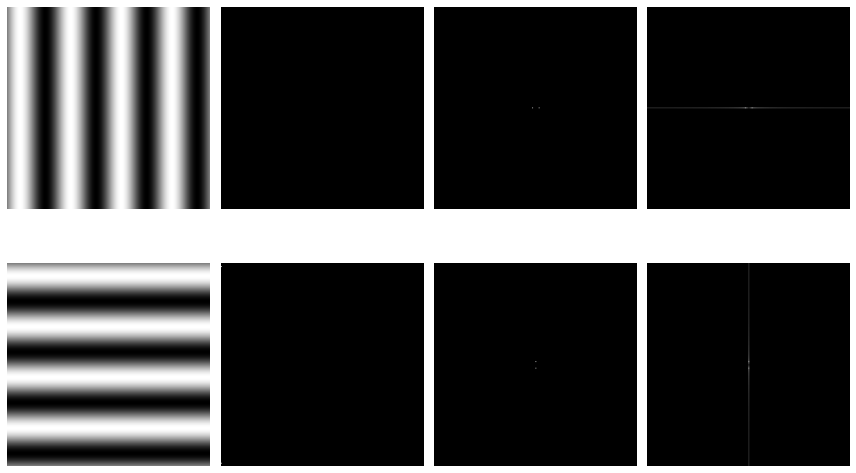

In [6]:
x = np.arange(0,8*np.pi,0.1)
y = np.sin(x)
A = np.zeros( (y.shape[0], y.shape[0]) )
B = np.zeros( (y.shape[0], y.shape[0]) )
for i in range(y.shape[0]):
    A[i,:] = y
for i in range(y.shape[0]):
    B[:,i] = y
    
A_dft = fp.fft2(A)
B_dft = fp.fft2(B)
S_A = np.abs(A_dft)
S_B = np.abs(B_dft)
S_A_shifted = fp.fftshift(S_A)
S_B_shifted = fp.fftshift(S_B)
S_A_scaled = 20*np.log10(1 + S_A_shifted)
S_B_scaled = 20*np.log10(1 + S_B_shifted)


fig, axis = plt.subplots(nrows=2, ncols=4, figsize=(12, 8), sharex=True, sharey=True)
axis[0,0].imshow(A, cmap='gray')
axis[0,1].imshow(S_A, cmap='gray')
axis[0,2].imshow(S_A_shifted, cmap='gray')
axis[0,3].imshow(S_A_scaled, cmap='gray')

axis[1,0].imshow(B, cmap='gray')
axis[1,1].imshow(S_B, cmap='gray')
axis[1,2].imshow(S_B_shifted, cmap='gray')
axis[1,3].imshow(S_B_scaled, cmap='gray')
#plt.axis('off')
for ax in axis.ravel(): 
    ax.set_axis_off() 

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

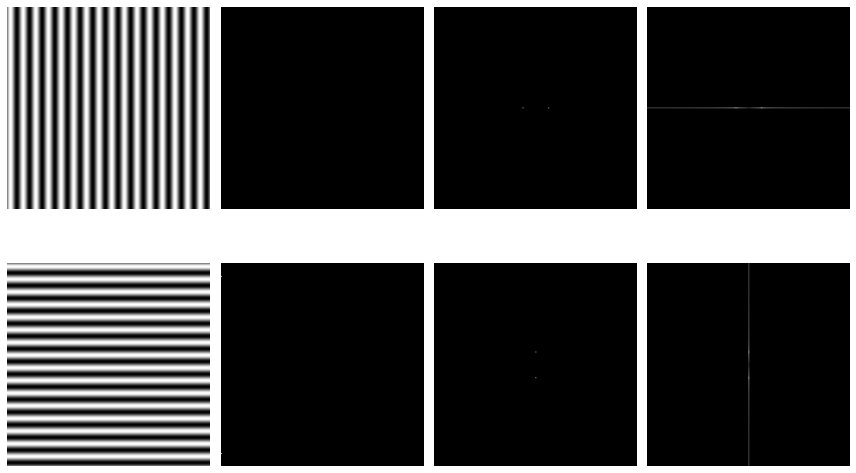

In [7]:
x = np.arange(0,8*np.pi,0.1)
y = np.sin(4*x)
A = np.zeros( (y.shape[0], y.shape[0]) )
B = np.zeros( (y.shape[0], y.shape[0]) )
for i in range(y.shape[0]):
    A[i,:] = y
for i in range(y.shape[0]):
    B[:,i] = y
    
A_dft = fp.fft2(A)
B_dft = fp.fft2(B)
S_A = np.abs(A_dft)
S_B = np.abs(B_dft)
S_A_shifted = fp.fftshift(S_A)
S_B_shifted = fp.fftshift(S_B)
S_A_scaled = 20*np.log10(1 + S_A_shifted)
S_B_scaled = 20*np.log10(1 + S_B_shifted)


fig, axis = plt.subplots(nrows=2, ncols=4, figsize=(12, 8), sharex=True, sharey=True)
axis[0,0].imshow(A, cmap='gray')
axis[0,1].imshow(S_A, cmap='gray')
axis[0,2].imshow(S_A_shifted, cmap='gray')
axis[0,3].imshow(S_A_scaled, cmap='gray')

axis[1,0].imshow(B, cmap='gray')
axis[1,1].imshow(S_B, cmap='gray')
axis[1,2].imshow(S_B_shifted, cmap='gray')
axis[1,3].imshow(S_B_scaled, cmap='gray')
#plt.axis('off')
for ax in axis.ravel(): 
    ax.set_axis_off() 

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

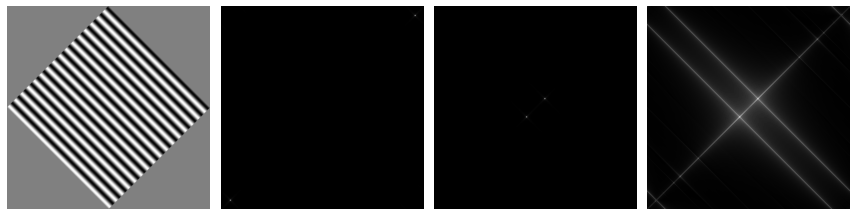

In [8]:
A_r = rotate(A, 45, resize=True)
A_r_dft = fp.fft2(A_r)
S_A_r = np.abs(A_r_dft)
A_r_sh = fp.fftshift(S_A_r)
A_r_scaled = 20*np.log10(1+A_r_sh)
fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(12, 8), sharex=True, sharey=True)
axis[0].imshow(A_r, cmap='gray')
axis[1].imshow(S_A_r, cmap='gray')
axis[2].imshow(A_r_sh, cmap='gray')
axis[3].imshow(A_r_scaled, cmap='gray')

for ax in axis.ravel(): 
    ax.set_axis_off() 

plt.tight_layout()
plt.show

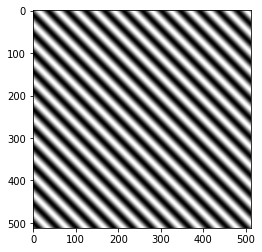

In [9]:
x = np.arange(0,50*np.pi,0.1)
y = np.sin(2*x)
A = np.zeros( (y.shape[0], y.shape[0]) )
for i in range(y.shape[0]):
    A[i,:] = y
A_r = rotate(A, 45, resize=False)

a_r = A_r[512:1024,512:1024]

plt.imshow(a_r,cmap='gray')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

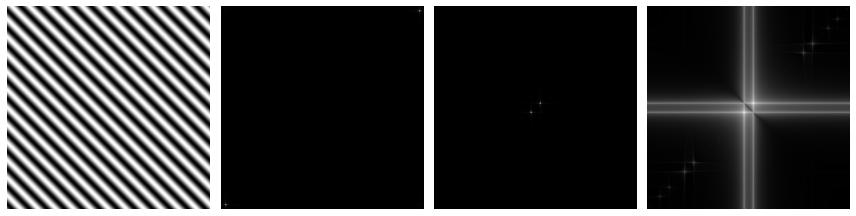

In [10]:
A_r_dft = fp.fft2(a_r)
S_A_r = np.abs(A_r_dft)
A_r_sh = fp.fftshift(S_A_r)
A_r_scaled = 20*np.log10(1+A_r_sh)
fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(12, 8), sharex=True, sharey=True)
axis[0].imshow(a_r, cmap='gray')
axis[1].imshow(S_A_r, cmap='gray')
axis[2].imshow(A_r_sh, cmap='gray')
axis[3].imshow(A_r_scaled, cmap='gray')

for ax in axis.ravel(): 
    ax.set_axis_off() 

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

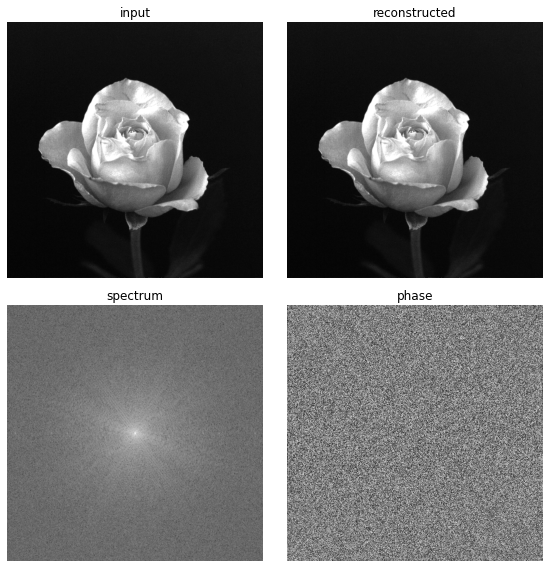

In [11]:
im = img_as_float(imread('images/rose512.tif'))
#compute the DFT
F_im = fp.fft2(im)
F_im_spectrum = np.abs(F_im)
F_im_ph = np.angle(F_im)

#reconstruct the image
F = np.multiply(F_im_spectrum, np.exp(1j*F_im_ph))
re_im = fp.ifft2(F).real


fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True)
axis[0,0].imshow(im, cmap='gray'),axis[0,0].set_title('input')
axis[0,1].imshow(re_im, cmap='gray'),axis[0,1].set_title('reconstructed')
axis[1,0].imshow(fp.fftshift(np.log(F_im_spectrum)), cmap='gray'), axis[1,0].set_title('spectrum')
axis[1,1].imshow(F_im_ph, cmap='gray'), axis[1,1].set_title('phase')


for ax in axis.ravel(): 
    ax.set_axis_off() 

plt.tight_layout()
plt.show